# Estimating PI value with Monte-Carlo method
This code was created as an example of randomized algorithm.
It produces random points and compares the number of them that falls into the circle of particular radius with
the total number of generated points. This calculation allows to estimate PI value.
The code also verifies how the number of generated points correlates with difference between the real PI
value and the estimated one.

In [1]:
from math import pi
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame, Series
from random import uniform

In [2]:
def generate_points_coords(
    number_of_points: int, bounds: tuple = (0.0, 1.0)
) -> DataFrame:
    return DataFrame(
        {
            "x": [uniform(*bounds) for _ in range(number_of_points)],
            "y": [uniform(*bounds) for _ in range(number_of_points)],
        }
    )


def circle_equation_value(x: Series, r: float = 1) -> float:
    return (r**2 - x**2) ** 0.5


def check_if_points_inside_circle(points: DataFrame, r: float = 1) -> DataFrame:
    points["is_inside"] = points["y"] <= circle_equation_value(points["x"], r)
    return points


def estimate_pi(number_of_points: int, points: DataFrame, r: float = 1) -> list:
    points = check_if_points_inside_circle(points, r)
    return [
        4
        * np.sum(points[:current_number_of_points]["is_inside"])
        / current_number_of_points
        for current_number_of_points in range(1, number_of_points + 1)
    ]


In [3]:
NUMBER_OF_POINTS = [100, 1000, 10000]
NUMBER_OF_ATTEMPTS = 5
MAX_NUMBER_OF_POINTS = NUMBER_OF_POINTS[-1]

In [4]:
pts = []
estimated_pi_list = {100: [], 1000: [], 10000: []}

for num in NUMBER_OF_POINTS:
    for attempt in range(NUMBER_OF_ATTEMPTS):
        pts = generate_points_coords(num)
        estimated_pi_list[num].append(estimate_pi(num, pts))

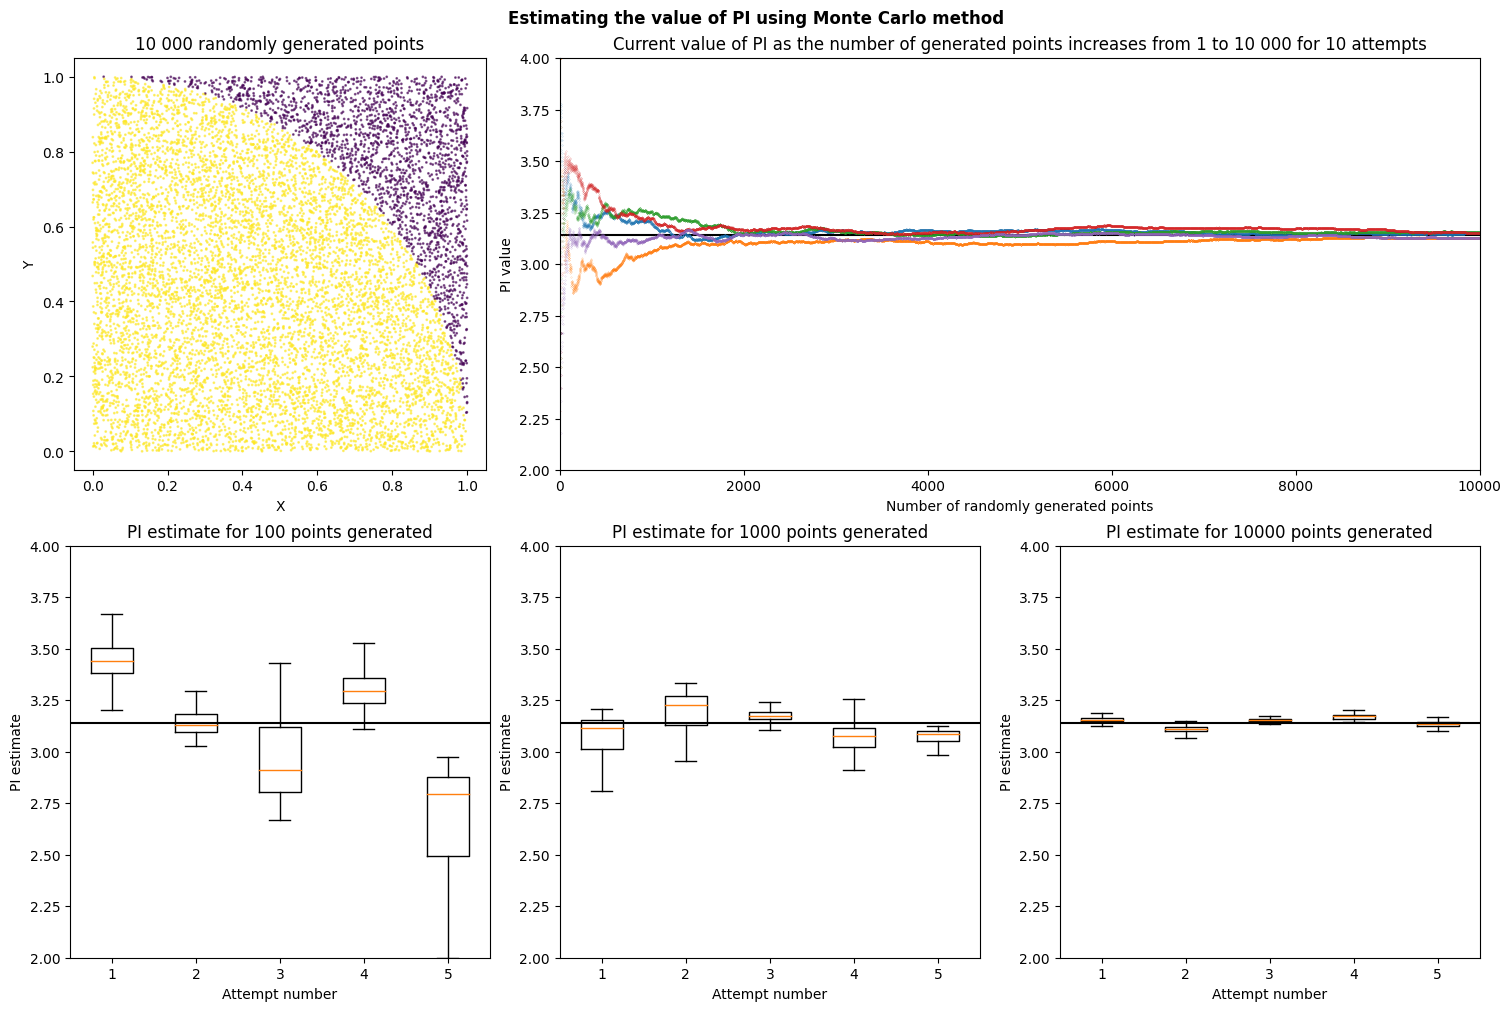

In [5]:
fig = plt.figure(constrained_layout=True, figsize=[15, 10])

gs = GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])
ax3 = fig.add_subplot(gs[-1, 0])
ax4 = fig.add_subplot(gs[-1, 1])
ax5 = fig.add_subplot(gs[-1, -1])

second_axes_row = [ax3, ax4, ax5]

fig.suptitle("Estimating the value of PI using Monte Carlo method", fontweight="bold")

ax1.scatter(pts["x"], pts["y"], alpha=0.6, s=1, c=pts["is_inside"])
ax1.set_aspect("equal", "box")
ax1.set_title("10 000 randomly generated points")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")

ax2.axhline(y=pi, color="black", zorder=1)
ax2.set_title(
    "Current value of PI as the number of generated points increases from 1 to 10 000 for 10 attempts"
)
ax2.set_xlim([0, 10000])
ax2.set_ylim([2, 4])
ax2.set_xlabel("Number of randomly generated points")
ax2.set_ylabel("PI value")
for estimated_pi in estimated_pi_list[MAX_NUMBER_OF_POINTS]:
    ax2.scatter(
        list(range(1, MAX_NUMBER_OF_POINTS + 1)),
        estimated_pi,
        alpha=1,
        s=0.01,
        zorder=2,
    )

for ax, num_of_points in zip(second_axes_row, NUMBER_OF_POINTS):
    ax.set_title(f"PI estimate for {num_of_points} points generated")
    ax.set_ylim([2, 4])
    ax.set_xlabel("Attempt number")
    ax.set_ylabel("PI estimate")
    ax.axhline(y=pi, color="black", zorder=2)
    ax.boxplot(estimated_pi_list[num_of_points], showfliers=False, zorder=1)

plt.show()